In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rc('font', size=10)

In [2]:
#palette_values2 =  ['#8FD7D7', '#00B0BE', '#FF8CAE', '#F45F74', '#BDD373', '#98C127', '#FFCD8E', '#FFB255', '#C17ADC', '#005D82']

palette_values2 =  ['#00B0BE', '#F45F74', '#98C127', '#FFCD8E', '#FFB255', '#C17ADC', '#005D82']
colors2 = sns.color_palette(palette_values2)
colors2

[(0.0, 0.6901960784313725, 0.7450980392156863),
 (0.9568627450980393, 0.37254901960784315, 0.4549019607843137),
 (0.596078431372549, 0.7568627450980392, 0.15294117647058825),
 (1.0, 0.803921568627451, 0.5568627450980392),
 (1.0, 0.6980392156862745, 0.3333333333333333),
 (0.7568627450980392, 0.47843137254901963, 0.8627450980392157),
 (0.0, 0.36470588235294116, 0.5098039215686274)]

In [3]:
colors_antiviral = sns.color_palette(['#00B0BE', '#005D82', '#C17ADC'])
colors_hlp = sns.color_palette(['#00B0BE', '#FFCD8E'])
colors_peplife = sns.color_palette(['#00B0BE', '#FFB255'])
colors_plifepred = sns.color_palette(['#00B0BE', '#005D82'])
colors_serum = sns.color_palette(['#00B0BE', '#98C127'])

In [4]:
df_data = pd.read_csv("described_dataset_full.csv")
df_data.head()

,sequence,Molecular weight,Isoelectric Point,Charge Density,Charge,Instability Index,Aromaticity,Aliphatic Index,Boman Index,Hydrophobic Ratio,...,M,P,Q,R,S,T,V,W,Y,Name Dataset
0,AAAMSQVTN,891.01,12.2500,0.0011,0.996,44.6000,0.0000,65.5556,0.7033,0.5556,...,11.111111,0.000000,11.111111,0.000000,11.111111,11.111111,11.111111,0.000000,0.000000,Antiviral
1,AACEVAKNLNESLIDLQELGKYEQYIKW,3268.71,4.6846,-0.0003,-1.068,46.1643,0.1071,104.6429,1.3254,0.3929,...,0.000000,0.000000,7.142857,0.000000,3.571429,0.000000,3.571429,3.571429,7.142857,Antiviral
2,AAGAVVNDL,827.93,6.5000,-0.0000,-0.004,-0.5444,0.0000,141.1111,-0.4456,0.6667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.222222,0.000000,0.000000,Antiviral
3,AAHLIDALYAEFLGGRVLTT,2130.45,7.6719,0.0000,0.096,23.2650,0.1000,132.0000,-0.0175,0.5500,...,0.000000,0.000000,0.000000,5.000000,0.000000,10.000000,5.000000,0.000000,5.000000,Antiviral
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,4779.56,10.1865,0.0005,2.194,58.3624,0.1111,121.5556,-0.0053,0.5556,...,0.000000,6.666667,2.222222,6.666667,4.444444,4.444444,11.111111,0.000000,4.444444,Antiviral


In [5]:
df_data.columns

Index(['sequence', 'Molecular weight', 'Isoelectric Point', 'Charge Density',
       'Charge', 'Instability Index', 'Aromaticity', 'Aliphatic Index',
       'Boman Index', 'Hydrophobic Ratio', 'hl_category', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V',
       'W', 'Y', 'Name Dataset'],
      dtype='object')

In [6]:
columns_with_properties = ["Molecular weight", "Isoelectric Point", "Charge Density",
                           "Charge", "Instability Index", "Aromaticity",
                           "Aliphatic Index", "Hydrophobic Ratio"]

In [7]:
list_df = []
for column in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
    df_values = df_data[["Name Dataset", column, "hl_category"]]
    df_values.columns = ["Name Dataset", "Percentage", "hl_category"]
    df_values["Residue"] = column
    list_df.append(df_values)

df_process = pd.concat(list_df, axis=0)
df_process

,Name Dataset,Percentage,hl_category,Residue
0,Antiviral,33.333333,Medium,A
1,Antiviral,10.714286,Medium,A
2,Antiviral,33.333333,Medium,A
3,Antiviral,20.000000,Medium,A
4,Antiviral,20.000000,Medium,A
...,...,...,...,...
3037,Serum,3.571429,Low,Y
3038,Serum,2.777778,High,Y
3039,Serum,0.000000,Low,Y
3040,Serum,0.000000,Low,Y


In [8]:
df_process["Name Dataset"].unique()

array(['Antiviral', 'HLP_10', 'HLP_16', 'PEPLIFE', 'Plifepred', 'Serum'],
      dtype=object)

In [9]:
df_process_1 = df_process[(df_process["Name Dataset"] == "Antiviral")]
df_process_2 = df_process[(df_process["Name Dataset"] == "HLP_10")]
df_process_3 = df_process[(df_process["Name Dataset"] == "HLP_16")]
df_process_4 = df_process[(df_process["Name Dataset"] == "PEPLIFE")]
df_process_5 = df_process[(df_process["Name Dataset"] == "Plifepred")]
df_process_6 = df_process[(df_process["Name Dataset"] == "Serum")]

In [10]:
hl_order = ["Low", "Medium", "High"]
df_process_1["hl_category"] = pd.Categorical(df_process_1["hl_category"], categories=hl_order, ordered=True)
df_process_2["hl_category"] = pd.Categorical(df_process_2["hl_category"], categories=hl_order, ordered=True)
df_process_3["hl_category"] = pd.Categorical(df_process_3["hl_category"], categories=hl_order, ordered=True)
df_process_4["hl_category"] = pd.Categorical(df_process_4["hl_category"], categories=hl_order, ordered=True)
df_process_5["hl_category"] = pd.Categorical(df_process_5["hl_category"], categories=hl_order, ordered=True)
df_process_6["hl_category"] = pd.Categorical(df_process_6["hl_category"], categories=hl_order, ordered=True)

In [11]:
list_dfs = [df_process_1, df_process_2, df_process_3, df_process_4, df_process_5, df_process_6]
list_tittle = ["Antiviral", "HLP 10", "HLP 16", "PEP_LIFE", "plifepred", "Serum"]

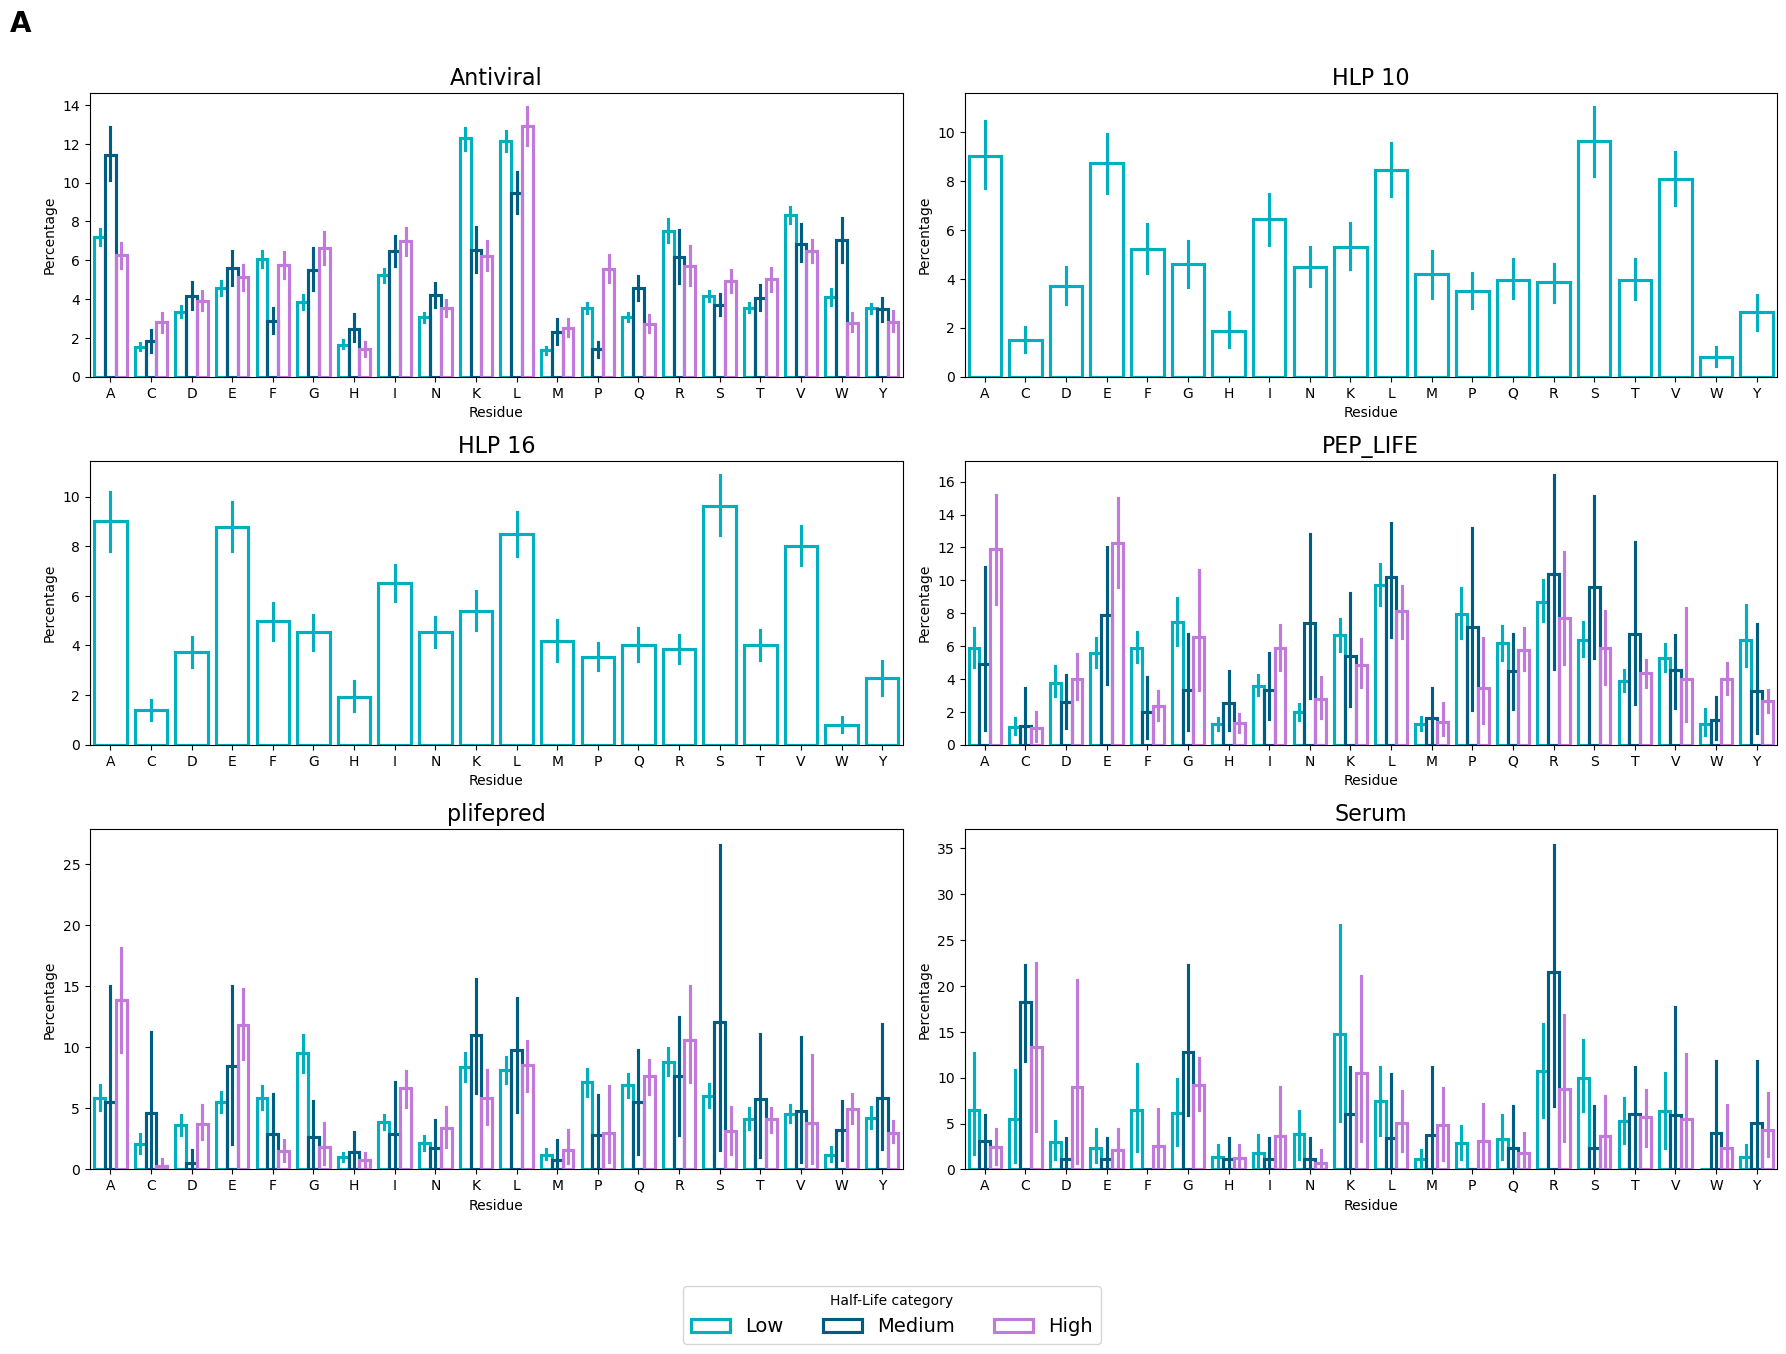

In [12]:
fig = plt.figure(figsize=(18,14))
gs = GridSpec(3, 4, figure=fig, height_ratios=[1, 1, 1.2]) 

fig.text(0.01, 0.95, "A", ha='left', va='top', fontsize=20, fontweight='bold')

ax_data1 = fig.add_subplot(gs[0, :2])
sns.barplot(ax=ax_data1, data=df_process_1, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data1.set_title("Antiviral", fontsize=16)

ax_data2 = fig.add_subplot(gs[0, 2:])
sns.barplot(ax=ax_data2, data=df_process_2, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data2.set_title("HLP 10", fontsize=16)

ax_data3 = fig.add_subplot(gs[1, :2])
sns.barplot(ax=ax_data3, data=df_process_3, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data3.set_title("HLP 16", fontsize=16)

ax_data4 = fig.add_subplot(gs[1, 2:])
sns.barplot(ax=ax_data4, data=df_process_4, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data4.set_title("PEP_LIFE", fontsize=16)

ax_data5 = fig.add_subplot(gs[2, :2])
sns.barplot(ax=ax_data5, data=df_process_5, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data5.set_title("plifepred", fontsize=16)

ax_data6 = fig.add_subplot(gs[2, 2:])
sns.barplot(ax=ax_data6, data=df_process_6, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data6.set_title("Serum", fontsize=16)

for ax in [ax_data1, ax_data2, ax_data3, ax_data4, ax_data5, ax_data6]:
    ax.legend_.remove()

handles, labels = ax_data1.get_legend_handles_labels() 
fig.legend(handles, labels, loc="lower center", ncol=len(labels), fontsize=14, title="Half-Life category", bbox_to_anchor=(0.5, -0.01))
plt.tight_layout(rect=[0.02, 0.08, 1, 0.92]) 
plt.savefig("../../img/description_amino_category.png", dpi=300, bbox_inches='tight')
plt.show()

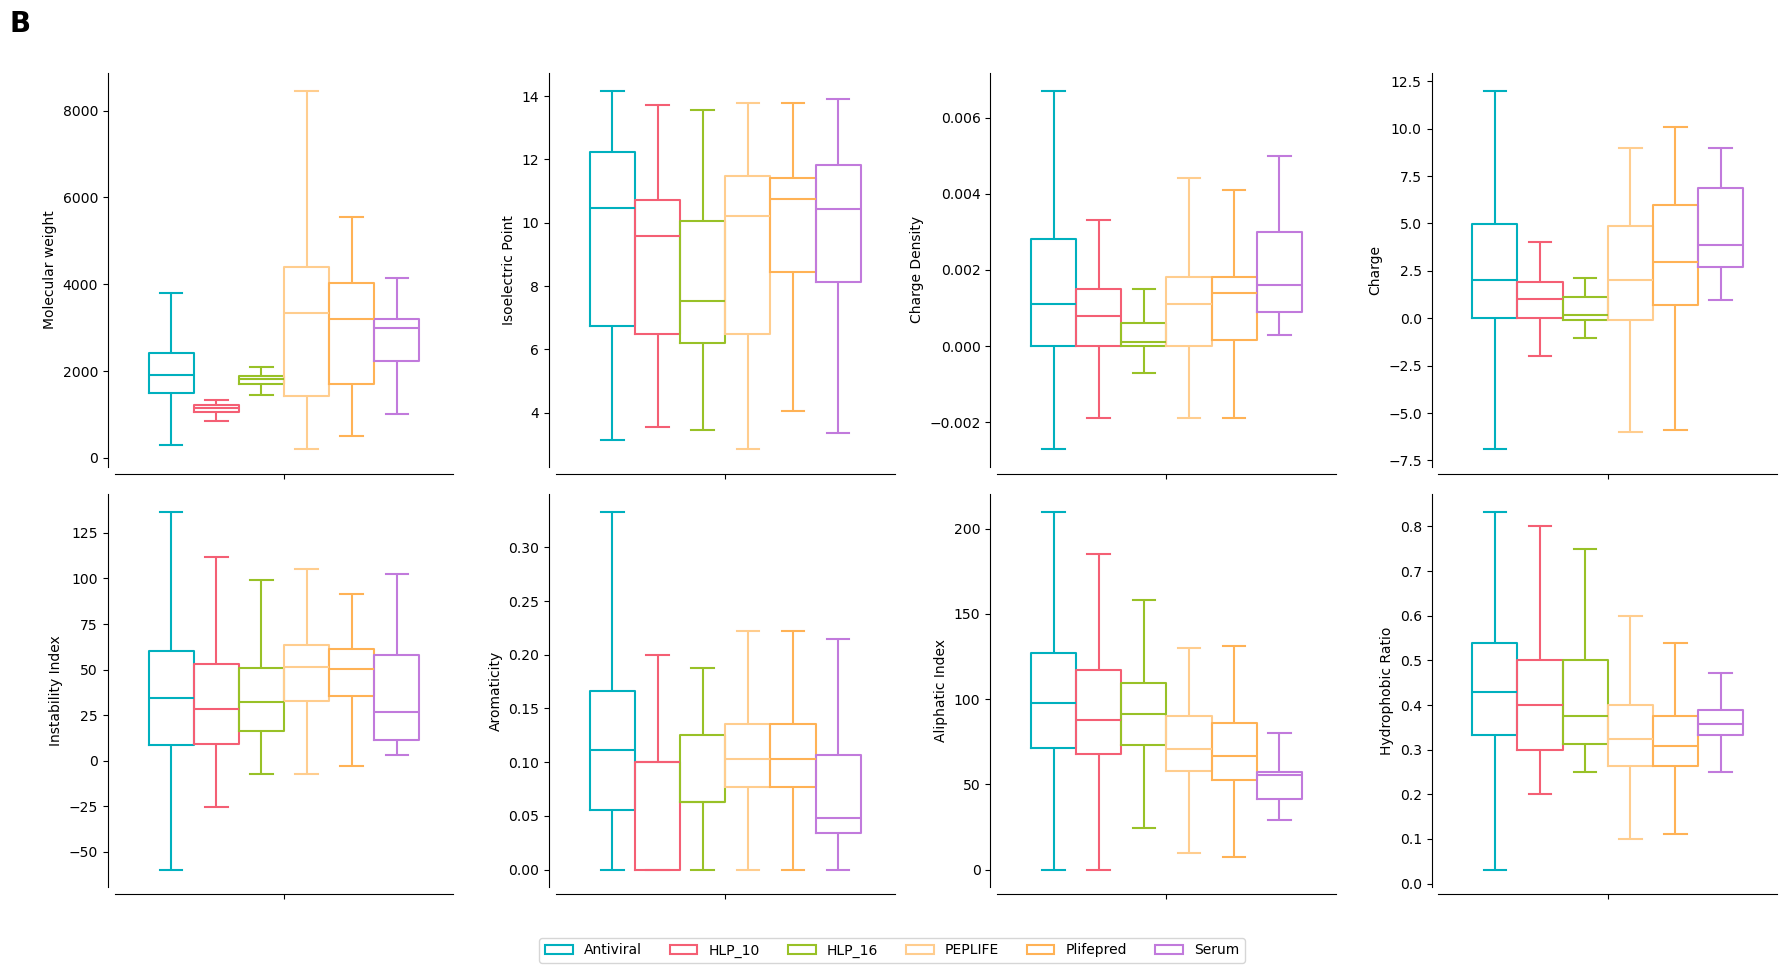

In [13]:
fig = plt.figure(figsize=(18,16))

fig.text(0.01, 0.95, "B", ha='left', va='top', fontsize=20, fontweight='bold')

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 4)
    ax = fig.add_subplot(gs[row, col_position])
    
    sns.boxplot(ax=ax, data=df_data, y=col, hue="Name Dataset", palette=colors2, showfliers=False, fill=False)
    ax.get_legend().remove()  # Eliminamos leyendas individuales

sns.despine(offset=5)

# Añadimos la leyenda común al final de la figura
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0.35))

plt.tight_layout(rect=[0.02, 0.08, 1, 0.92])
plt.savefig("../../img/description_amino_effects.png", dpi=300, bbox_inches='tight')
plt.show()

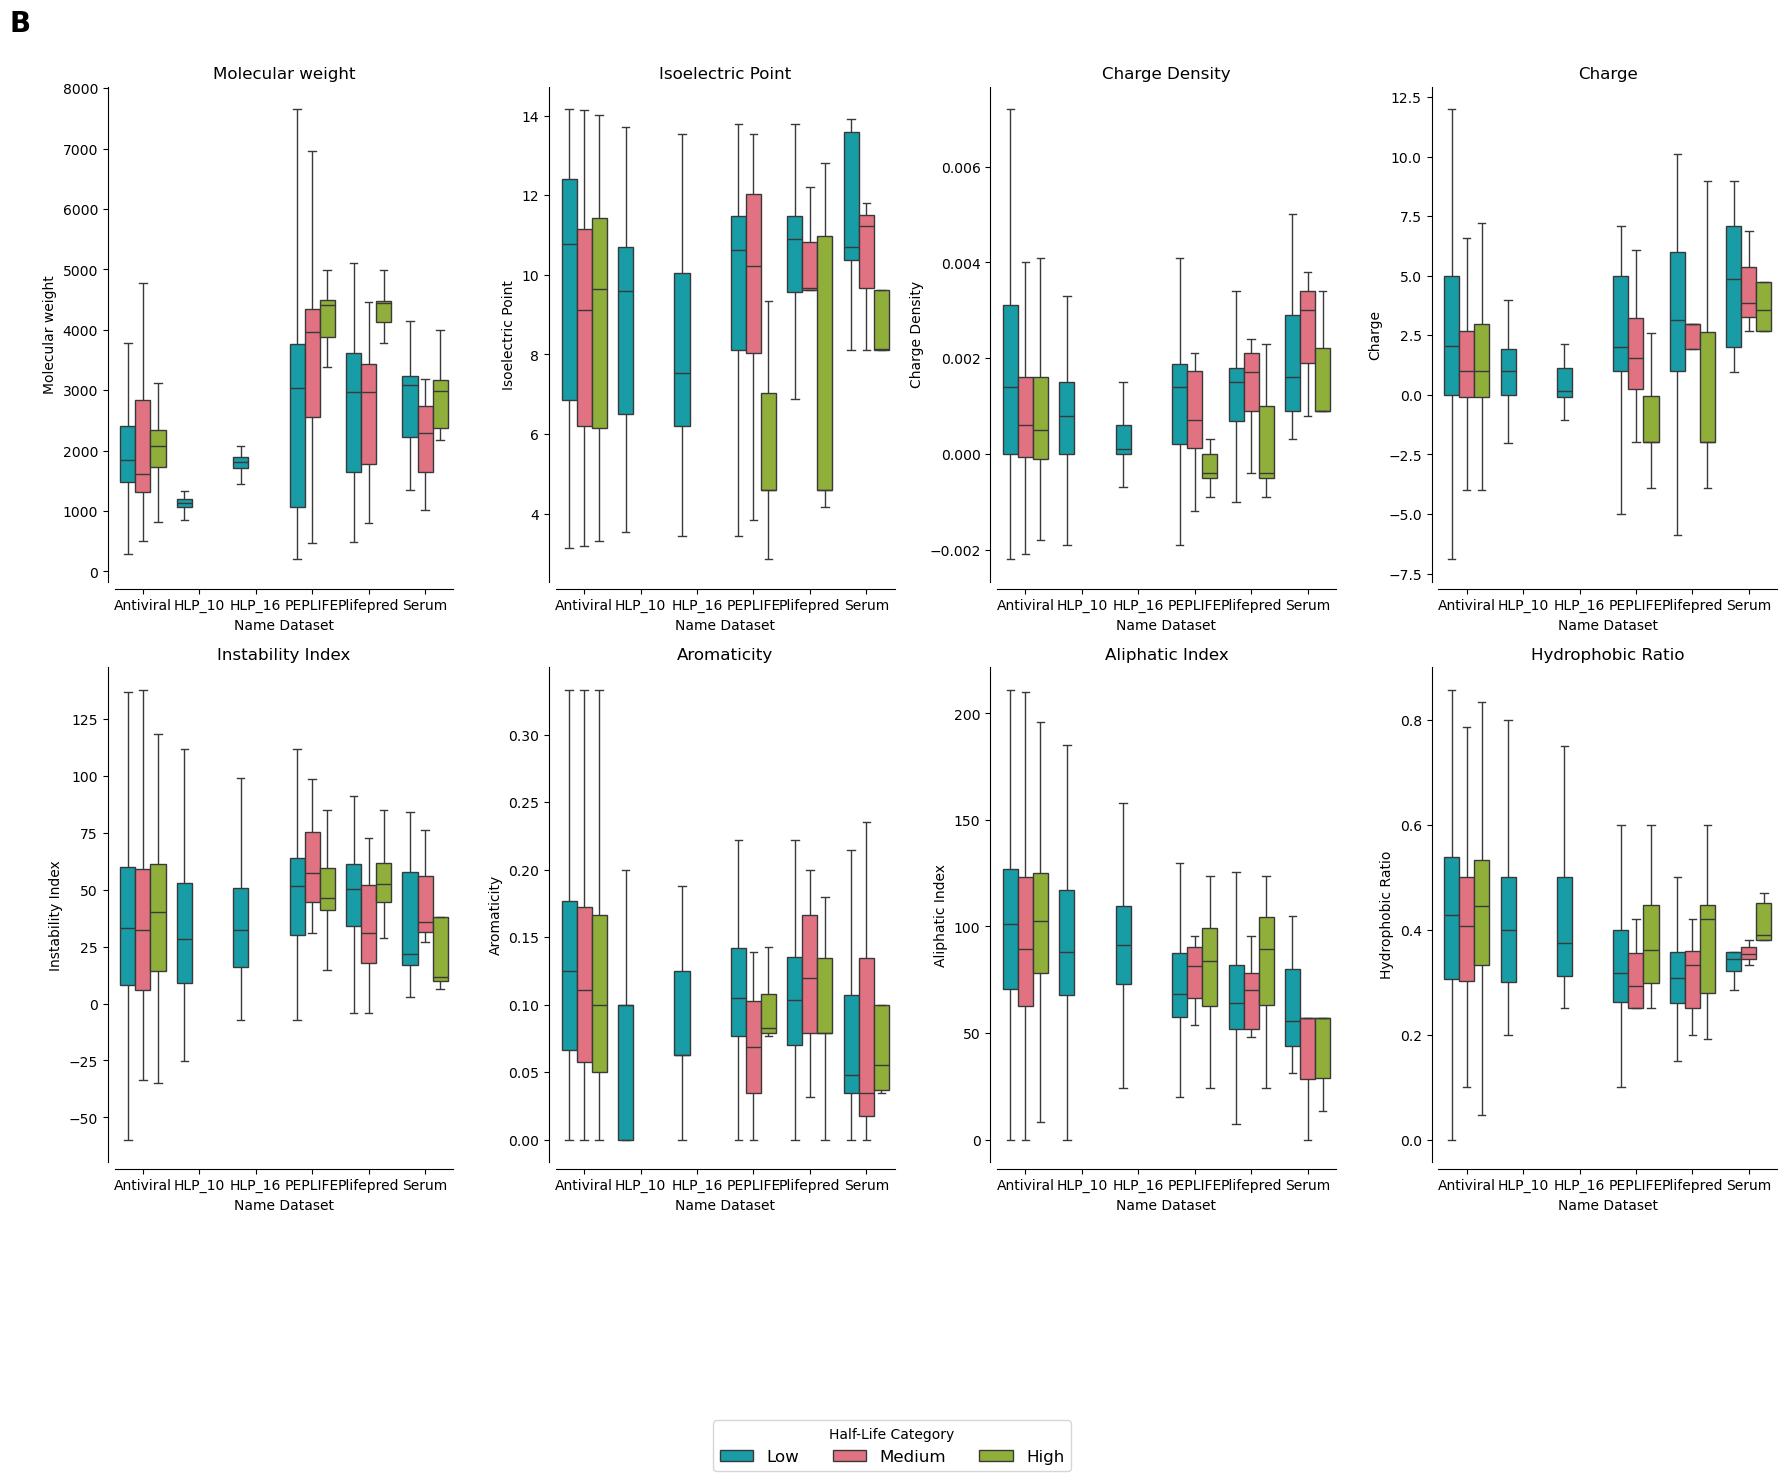

In [14]:
# Crear una columna combinada para representar el Dataset y la Categoría
df_data['Dataset_Category'] = df_data['Name Dataset'] + " - " + df_data['hl_category']

# Ajustar los gráficos
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(2, 4, figure=fig, height_ratios=[1, 1])

fig.text(0.01, 0.95, "B", ha='left', va='top', fontsize=20, fontweight='bold')

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 4)
    ax = fig.add_subplot(gs[row, col_position])
    
    # Cambiamos el eje x para usar la columna combinada
    sns.boxplot(
        ax=ax,
        data=df_data,
        x="Name Dataset",  # Grupos principales
        y=col,  # Propiedad o característica actual
        hue="hl_category",  # Subcategorías
        hue_order=hl_order,  # Orden de las subcategorías
        palette=colors2,  # Paleta de colores
        showfliers=False
    )
    
    ax.set_title(col, fontsize=12)  # Opcional: Título del subgráfico
    ax.get_legend().remove()  # Eliminamos leyendas individuales

sns.despine(offset=5)

# Añadir leyenda común
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=len(labels),
    bbox_to_anchor=(0.5, -0.1),
    fontsize=12,
    title="Half-Life Category"
)

plt.tight_layout(rect=[0.02, 0.08, 1, 0.92])
plt.savefig("../../img/description_amino_effects_grouped.png", dpi=300, bbox_inches='tight')
plt.show()
